In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rohlik-orders-forecasting-challenge/test_calendar.csv
/kaggle/input/rohlik-orders-forecasting-challenge/solution_example.csv
/kaggle/input/rohlik-orders-forecasting-challenge/train.csv
/kaggle/input/rohlik-orders-forecasting-challenge/test.csv
/kaggle/input/rohlik-orders-forecasting-challenge/train_calendar.csv


In [2]:
# Matplotlib defaults
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
from warnings import simplefilter

simplefilter("ignore") 

train = pd.read_csv("/kaggle/input/rohlik-orders-forecasting-challenge/train.csv", index_col='date', parse_dates=['date'])
test = pd.read_csv("/kaggle/input/rohlik-orders-forecasting-challenge/test.csv")
trainc = pd.read_csv("/kaggle/input/rohlik-orders-forecasting-challenge/train_calendar.csv")
testc = pd.read_csv("/kaggle/input/rohlik-orders-forecasting-challenge/test_calendar.csv")

In [4]:
train.head()

,warehouse,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
date,,,,,,,,,,,,,,,,,
2020-12-05,Prague_1,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
2020-12-06,Prague_1,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2020-12-07,Prague_1,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
2020-12-08,Prague_1,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
2020-12-09,Prague_1,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [5]:
test.head()

,warehouse,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,NaN,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,NaN,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,NaN,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,NaN,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,NaN,0,0,0,0,Prague_1_2024-03-20


In [6]:
train.columns

Index(['warehouse', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id'],
      dtype='object')

- Looking at the non available columns that exist in train

In [7]:
cols = ['shutdown', 'holiday_name', 
       'mini_shutdown', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id']

train = train.drop(cols, axis= 1)

array([[<Axes: title={'center': 'orders'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'shops_closed'}>,
        <Axes: title={'center': 'winter_school_holidays'}>],
       [<Axes: title={'center': 'school_holidays'}>, <Axes: >]],
      dtype=object)

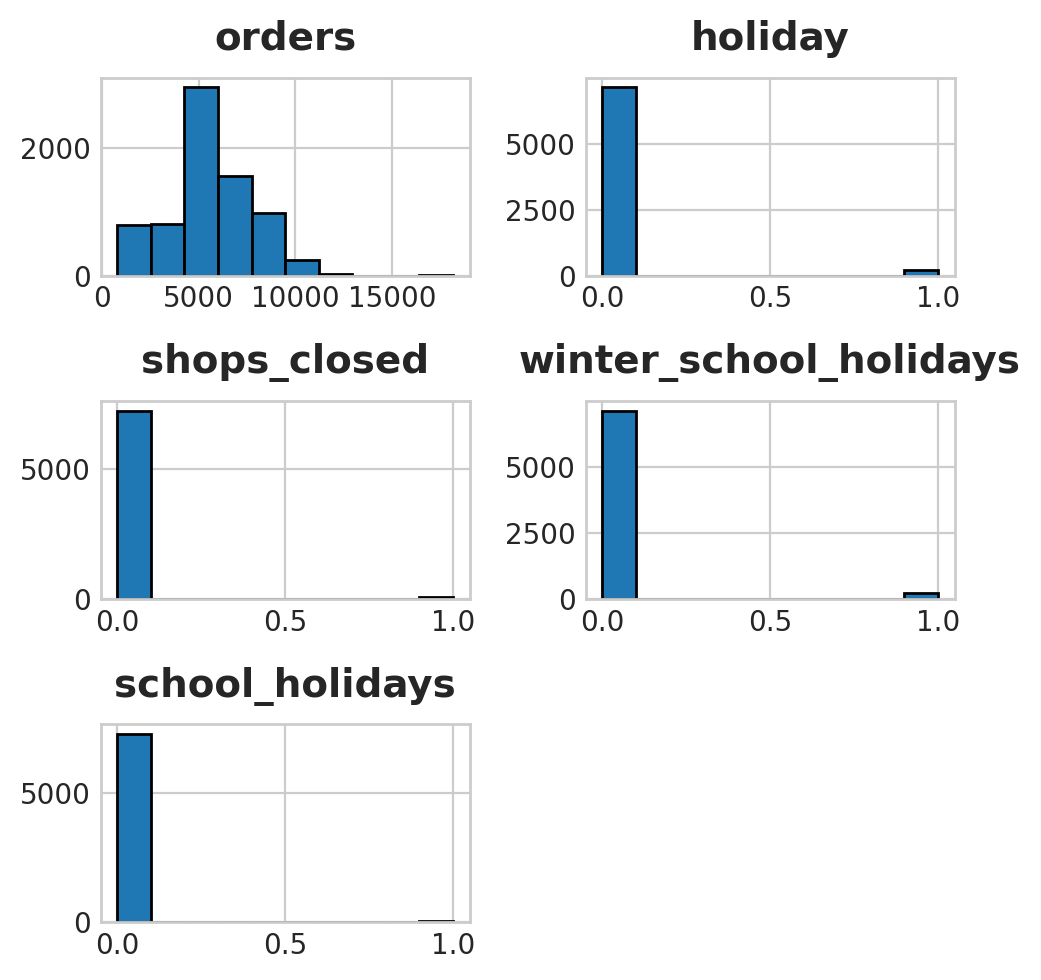

In [8]:
%matplotlib inline 
train.hist(figsize=(5,5), edgecolor='black')

In [9]:
train.isna().sum()

warehouse                 0
orders                    0
holiday                   0
shops_closed              0
winter_school_holidays    0
school_holidays           0
dtype: int64

In [10]:
# train['date'] = pd.to_datetime(train['date'],format='%Y-%m-%d')

In [11]:
# train['day']=train['date'].dt.day
# train['month']=train['date'].dt.month
# train['year']=train['date'].dt.year

In [12]:
train['time'] = np.arange(len(train))

In [13]:
t1 = train.copy()

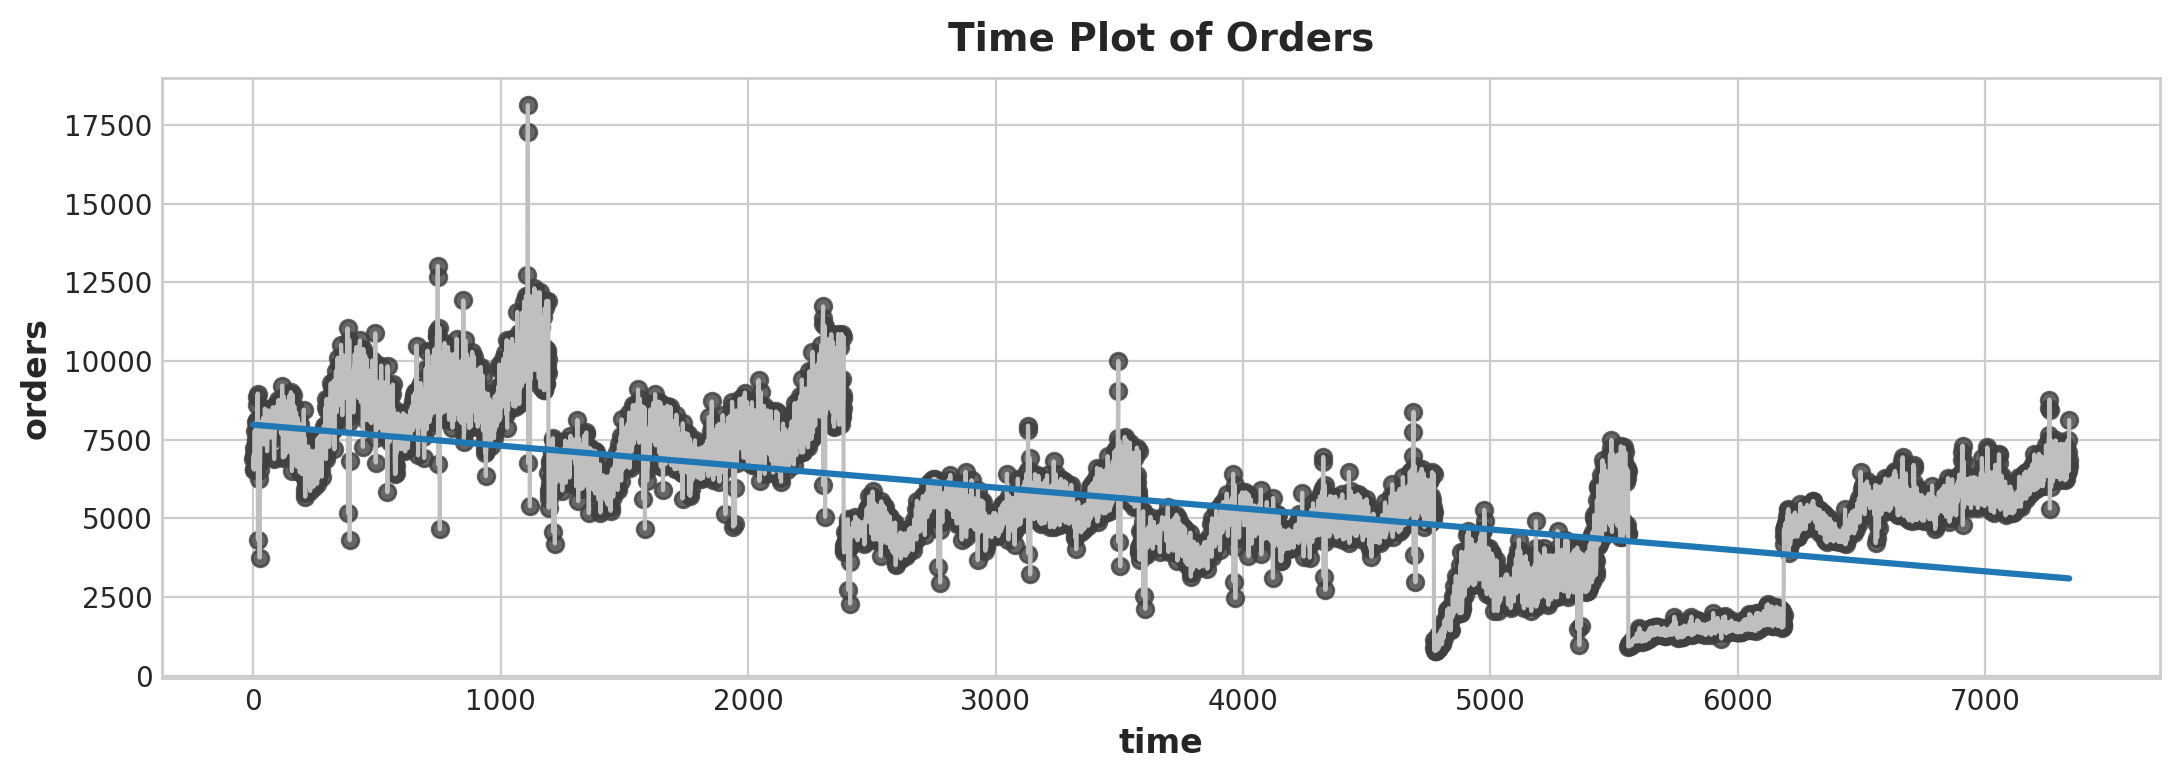

In [14]:
fig, ax = plt.subplots()
ax.plot('time', 'orders', data=t1, color='0.75')
ax = sns.regplot(x='time', y='orders', data=t1,  scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Orders');

In [15]:
t1['lag_1'] = t1['orders'].shift(1)
t1 = t1.dropna()

t1.head()

,warehouse,orders,holiday,shops_closed,winter_school_holidays,school_holidays,time,lag_1
date,,,,,,,,
2020-12-06,Prague_1,6584.0,0,0,0,0,1,6895.0
2020-12-07,Prague_1,7030.0,0,0,0,0,2,6584.0
2020-12-08,Prague_1,6550.0,0,0,0,0,3,7030.0
2020-12-09,Prague_1,6910.0,0,0,0,0,4,6550.0
2020-12-10,Prague_1,7228.0,0,0,0,0,5,6910.0


Text(0.5, 1.0, 'Lag Plot of Orders')

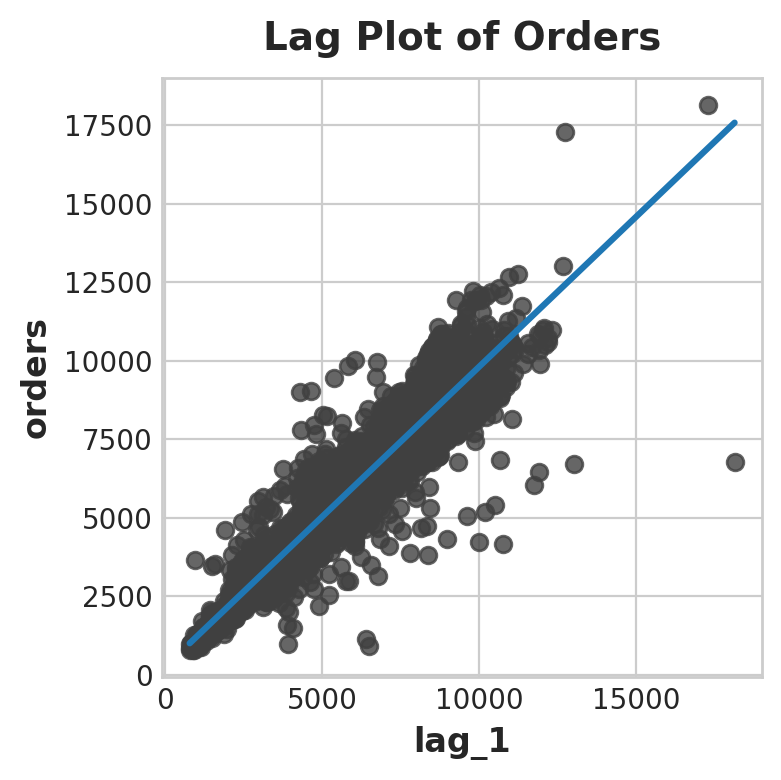

In [16]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='orders', data=t1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Orders')

In [17]:
train.head()

,warehouse,orders,holiday,shops_closed,winter_school_holidays,school_holidays,time
date,,,,,,,
2020-12-05,Prague_1,6895.0,0,0,0,0,0
2020-12-06,Prague_1,6584.0,0,0,0,0,1
2020-12-07,Prague_1,7030.0,0,0,0,0,2
2020-12-08,Prague_1,6550.0,0,0,0,0,3
2020-12-09,Prague_1,6910.0,0,0,0,0,4


<Axes: xlabel='time'>

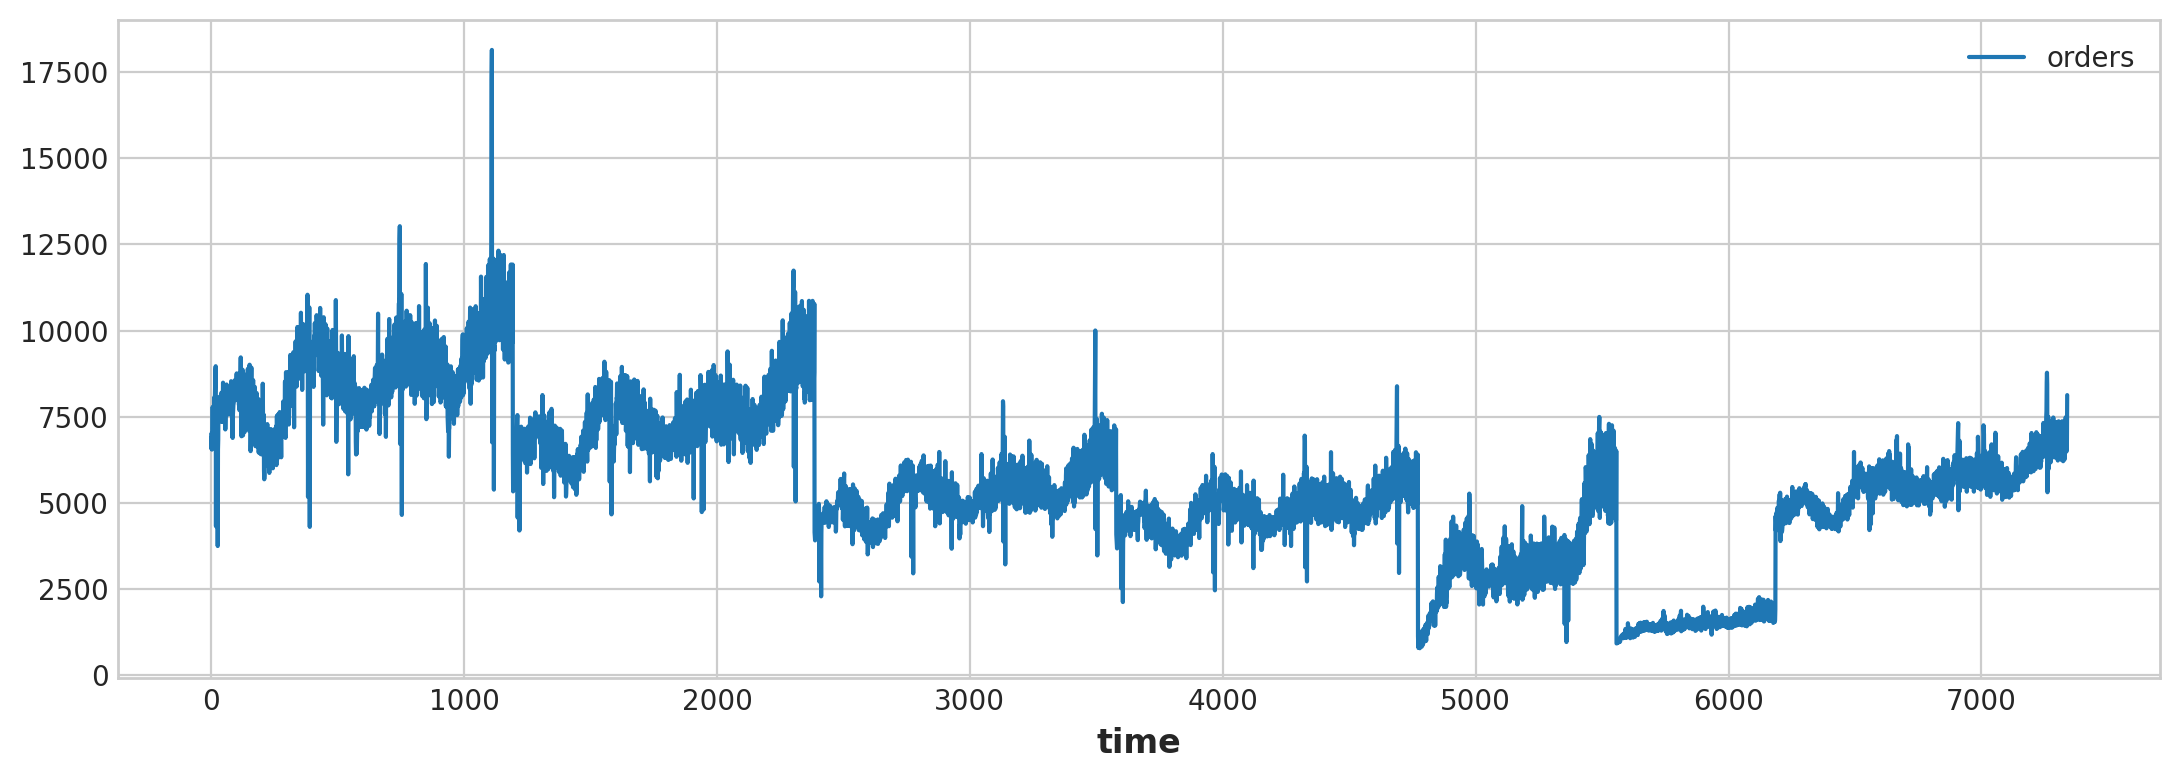

In [18]:
train.plot('time', 'orders')

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
data = ohe.fit_transform(train[['warehouse']])

train1 = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(['warehouse']))



In [20]:
# train1.reset_index(drop=True, inplace=True)

In [21]:
train = pd.concat([train.drop('warehouse', axis=1).reset_index(drop=True), train1.reset_index(drop=True)], axis=1, join='outer')


In [22]:
train.head()  

,orders,holiday,shops_closed,winter_school_holidays,school_holidays,time,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6584.0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7030.0,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6550.0,0,0,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6910.0,0,0,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


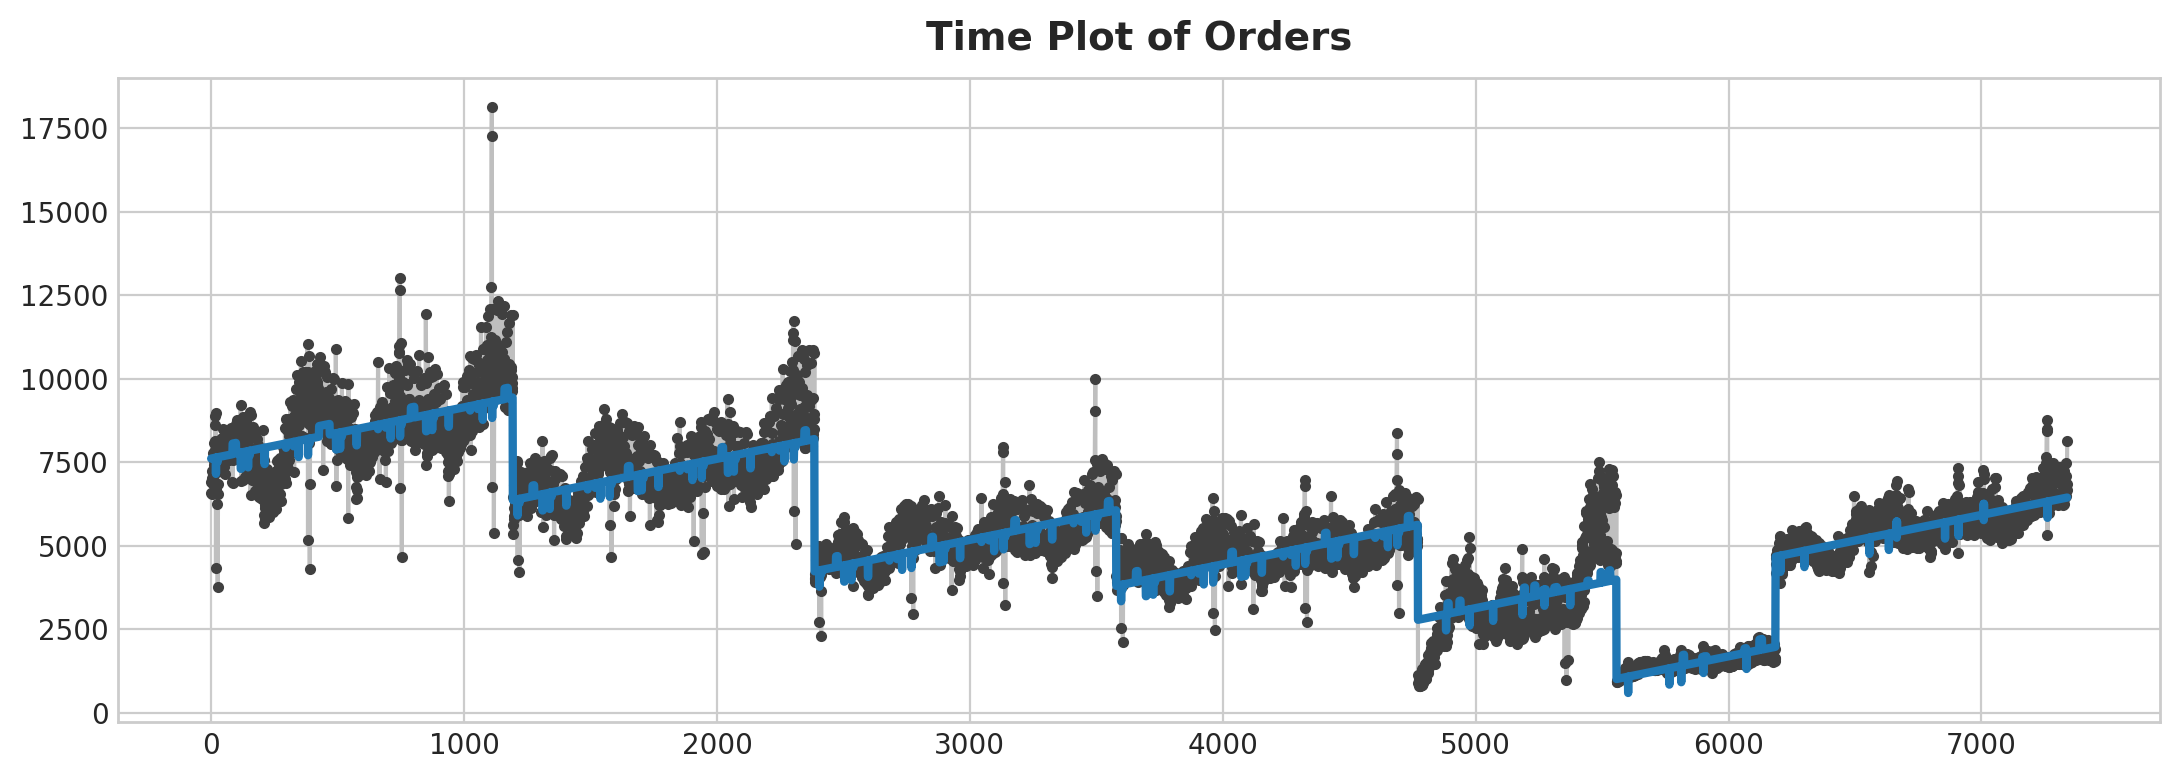

In [23]:
from sklearn.linear_model import LinearRegression


X = train.drop('orders', axis=1)  
y = train['orders'] 


model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Orders');

In [24]:
# Lag features
X['lag_1'] = train['orders'].shift(1)
X.loc[0, 'lag_1']=0
X.head()

,holiday,shops_closed,winter_school_holidays,school_holidays,time,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3,lag_1
0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6895.0
2,0,0,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6584.0
3,0,0,0,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7030.0
4,0,0,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6550.0


In [25]:
X.columns

Index(['holiday', 'shops_closed', 'winter_school_holidays', 'school_holidays',
       'time', 'warehouse_Brno_1', 'warehouse_Budapest_1',
       'warehouse_Frankfurt_1', 'warehouse_Munich_1', 'warehouse_Prague_1',
       'warehouse_Prague_2', 'warehouse_Prague_3', 'lag_1'],
      dtype='object')

In [26]:
# Linear Regression model from before

model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Orders')

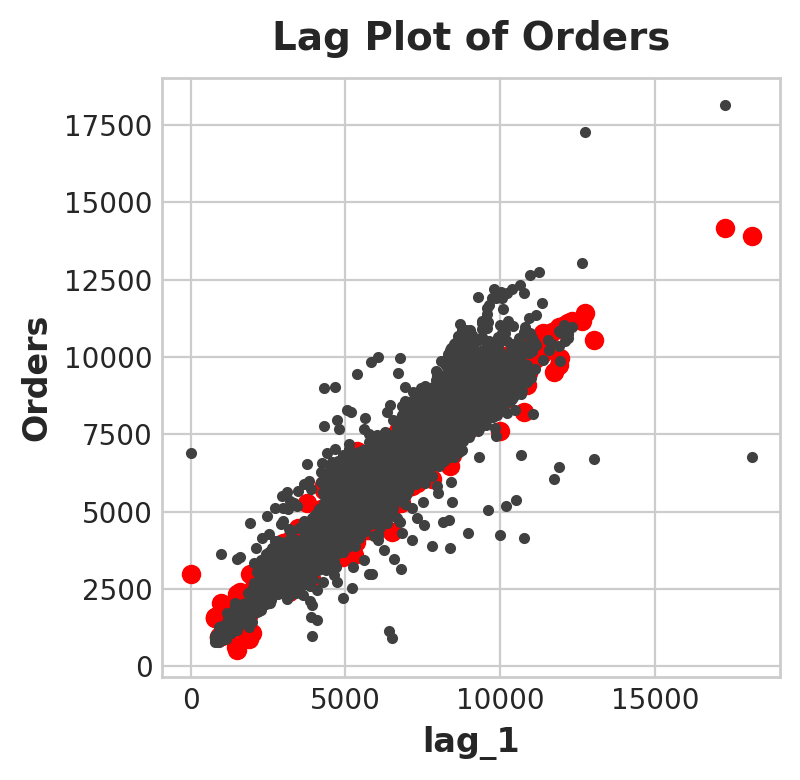

In [27]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
# sns.kdeplot(data=X, x="lag_1")
ax.scatter(X['lag_1'], y_pred, color='red')
ax.set_aspect('equal')
ax.set_ylabel('Orders')
ax.set_xlabel('lag_1')
ax.set_title('Lag Plot of Orders')


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

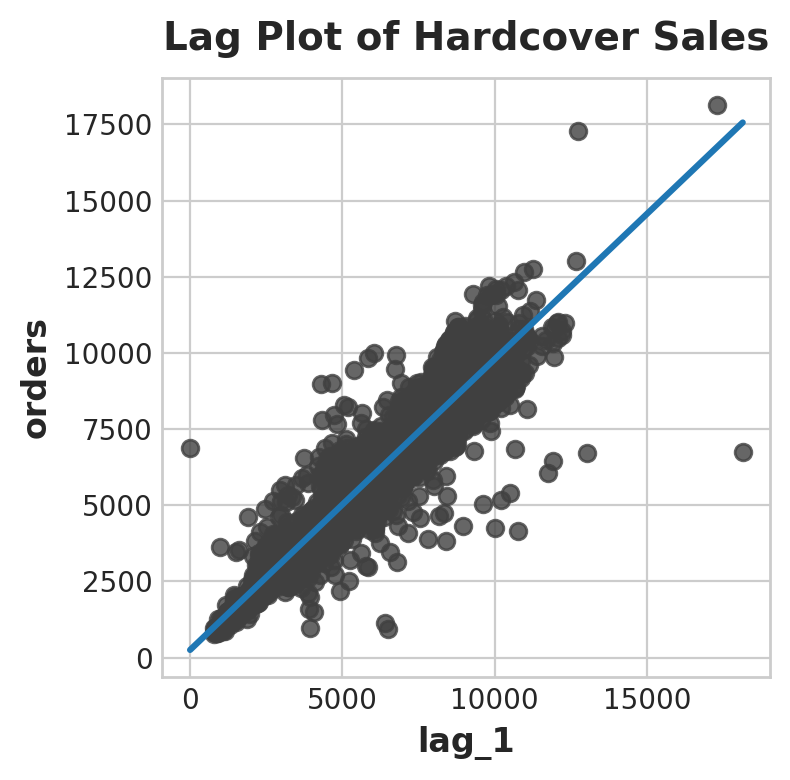

In [28]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y=y, data=X, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

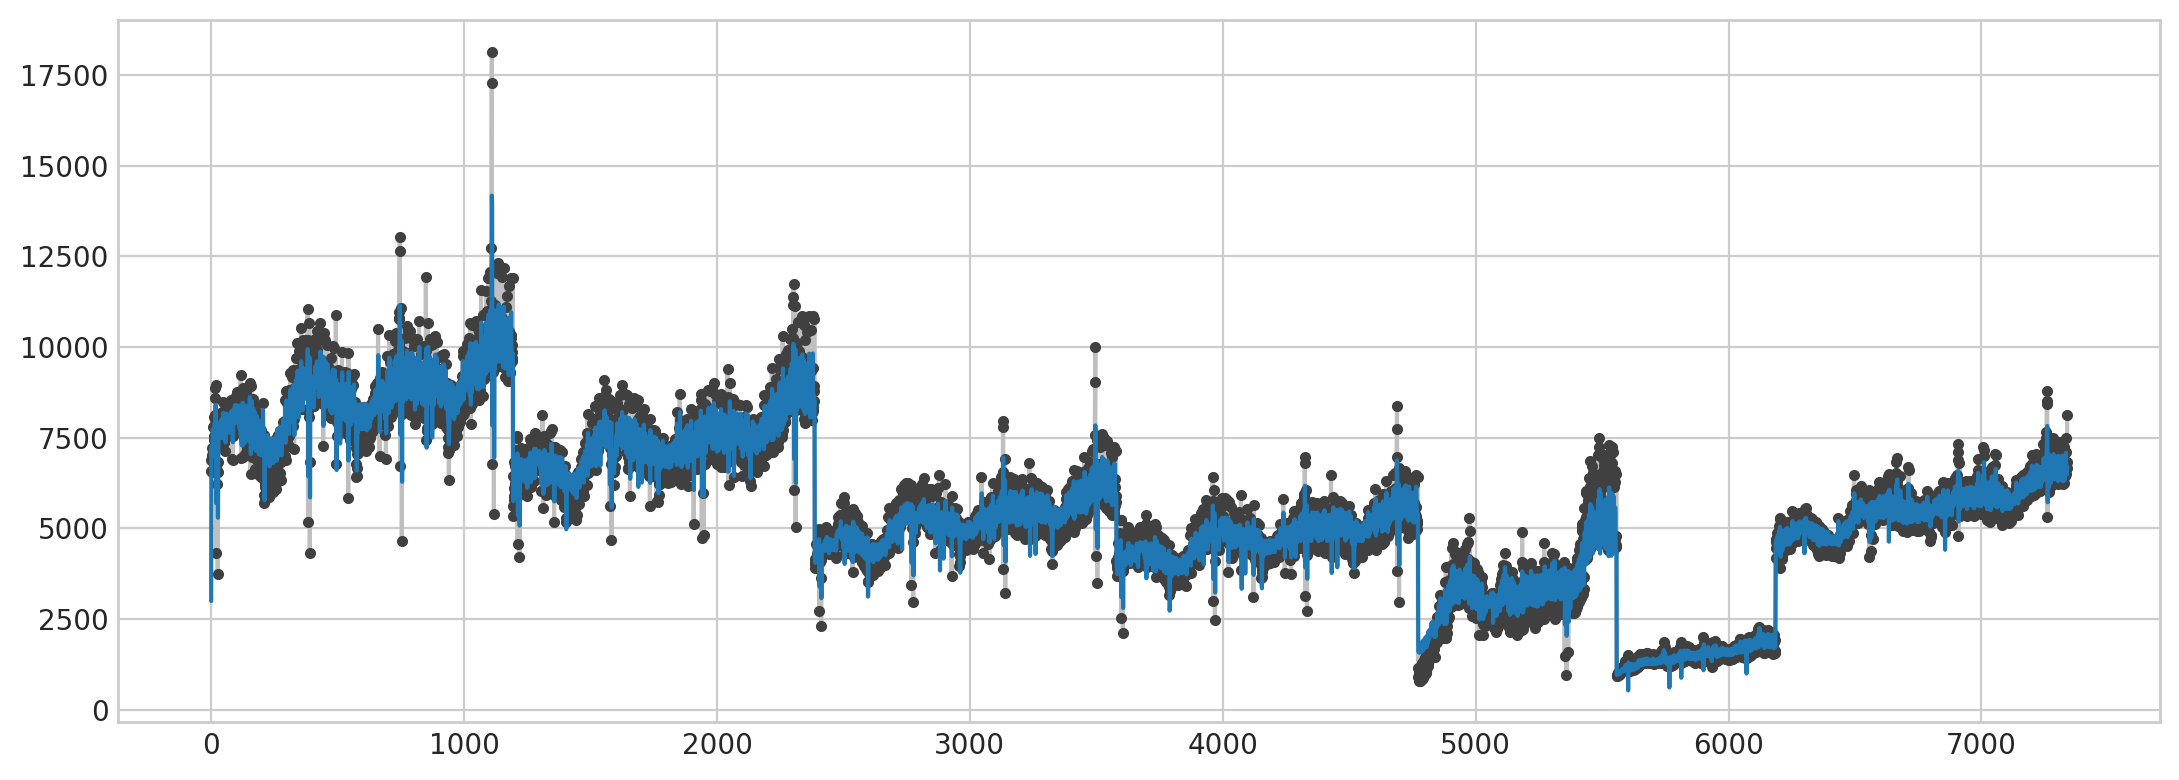

In [29]:
ax = train['orders'].plot(**plot_params)
ax = y_pred.plot()

## Rolling average

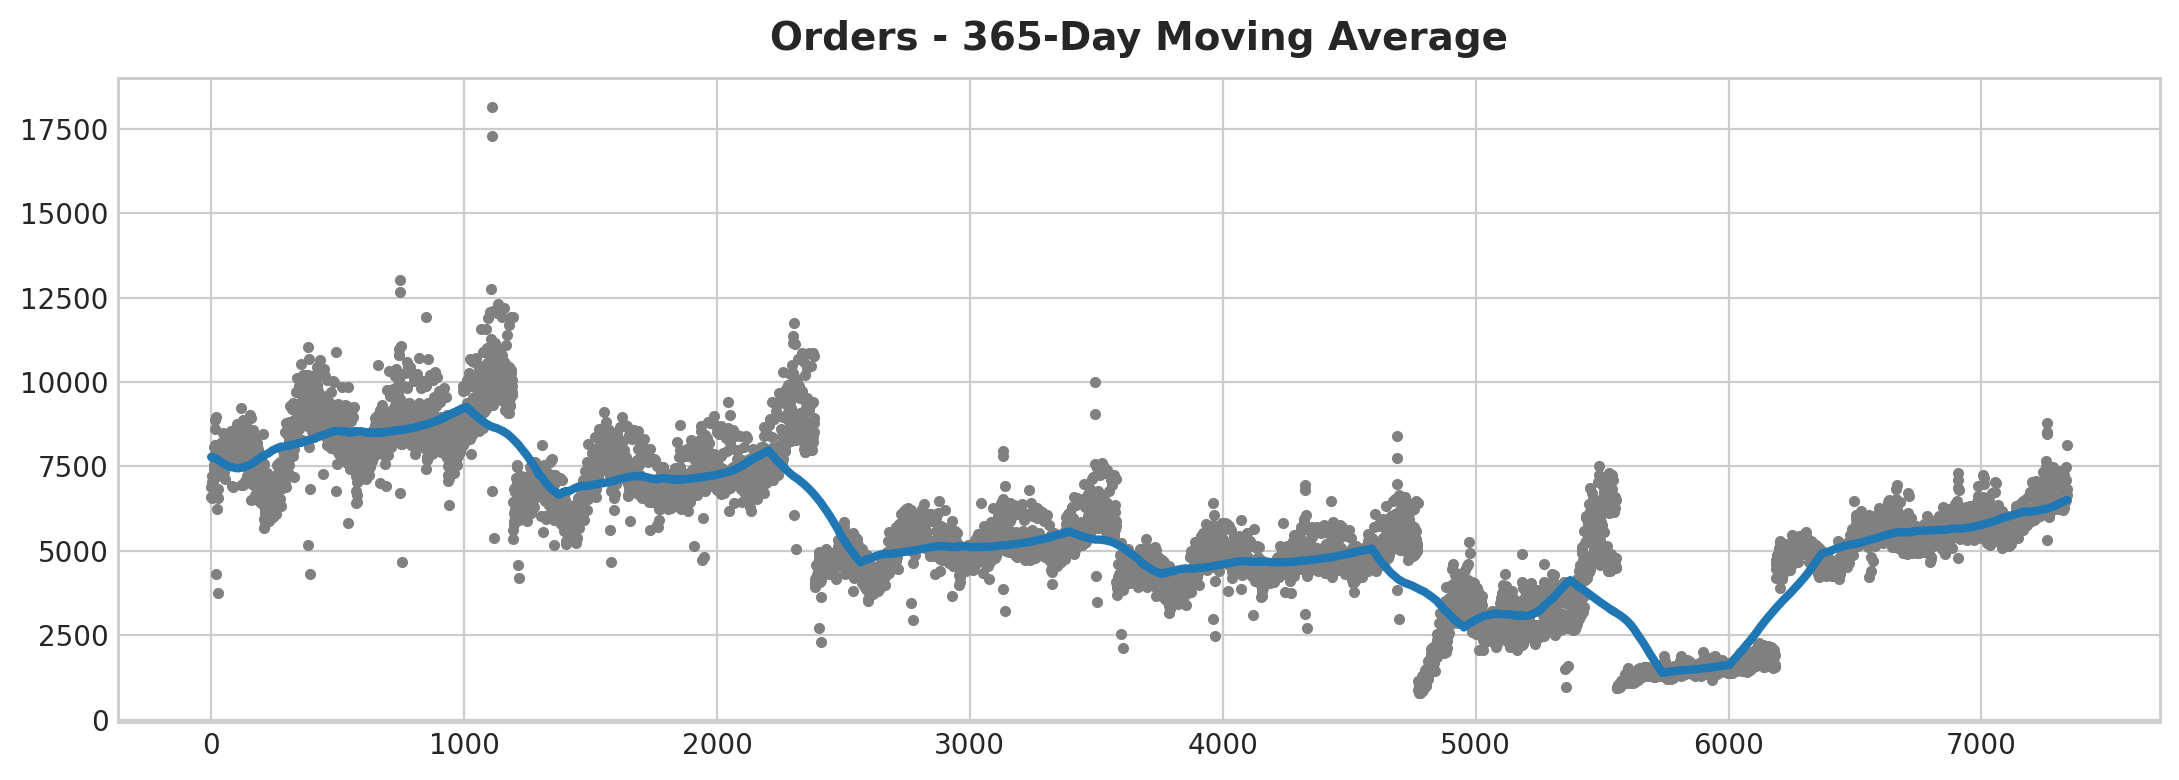

In [30]:
moving_average =  train['orders'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = train['orders'].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Orders - 365-Day Moving Average", legend=False,
);

In [31]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0


In [32]:
from sklearn.linear_model import LinearRegression

y = train["orders"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

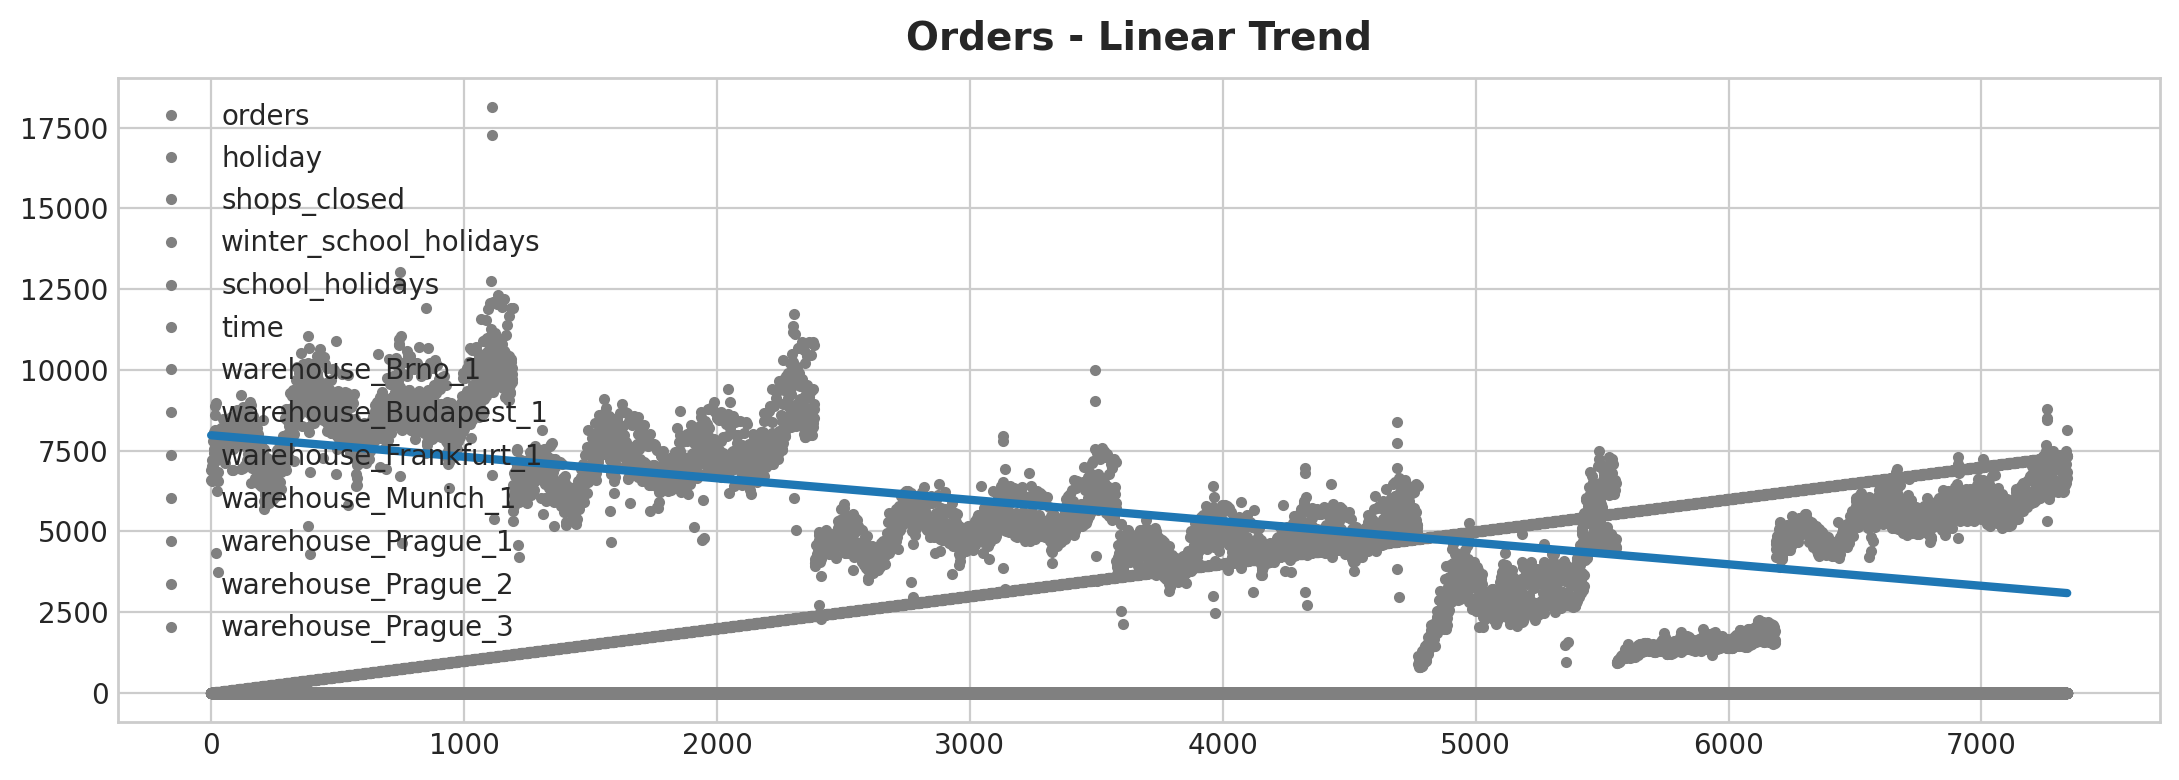

In [33]:
ax = train.plot(style=".", color="0.5", title="Orders - Linear Trend")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")